# PS4 Q2[3,4]: Impulse responses to monetary shocks in simple NKM

### Function to simulate AR(1) process

In [168]:
function ar1(alpha, rho, sigma2, T, y0);
   
    # Generate vector of (normal) shocks
    e = sqrt(sigma2)*randn(T);          
    
    # Initial value
    Y = [y0];
    
    # Simulate AR(1)
    
    for i = 1:T
        y = alpha + rho*Y[i] + e[i]
        Y =[Y;y]
    end
    
    # Remove y0 from simulated vector
    #Y=Y[2:end];
    
    return Y;
end

ar1 (generic function with 1 method)

### Simulate AR(1) process with $\sigma^2=0$ for IRFs

In [169]:
eps=ar1(0,0.9,0,100,0.25);

### Baseline calibration

In [130]:
beta=0.99;
kappa=0.023;
theta=0.16^(-1);
phipi=1.5;
phiy=0.5;
rho=0.9;

### Equilibrium

In [131]:
lambda = ((1-beta*rho)*(theta*(1-rho)+phiy)+kappa*(phipi-rho))^(-1);
gammay = -(1-beta*rho)*lambda;
gammapi = -kappa*lambda;

y = gammay*eps;
pi = gammapi*eps;


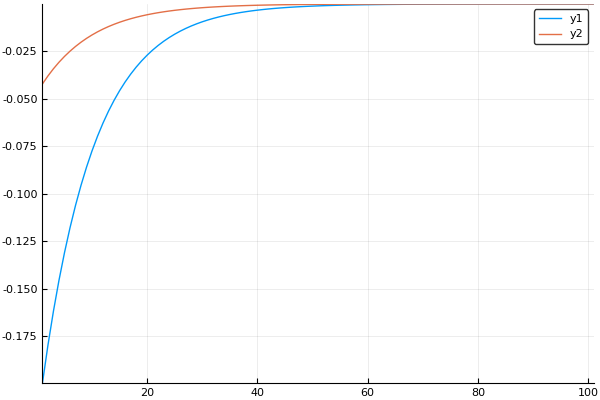

In [107]:
plot([y,pi])

## Varying the parameters of the model

### Lower $\beta$

In [192]:
using LaTeXStrings 
gammayvec=[];
gammapivec=[];
yvals=Array{Vector}(3);
pivals=Array{Vector}(3);
betavec  =[0.99, 0.96, 0.5];
labels = Array{String}(1, 3)

for i = 1:3
    lambda = ((1-betavec[i]*rho)*(theta*(1-rho)+phiy)+kappa*(phipi-rho))^(-1)
    
    gammay = -(1-betavec[i]*rho)*lambda
    gammapi = -kappa*lambda
    
    gammayvec = [gammayvec;gammay]
    gammapivec = [gammapivec;gammapi]
    
    yvals[i]=gammayvec[i]*eps
    pivals[i]=gammapivec[i]*eps
    
    b = string(L"$\beta = $", betavec[i])
    labels[i] = b
end


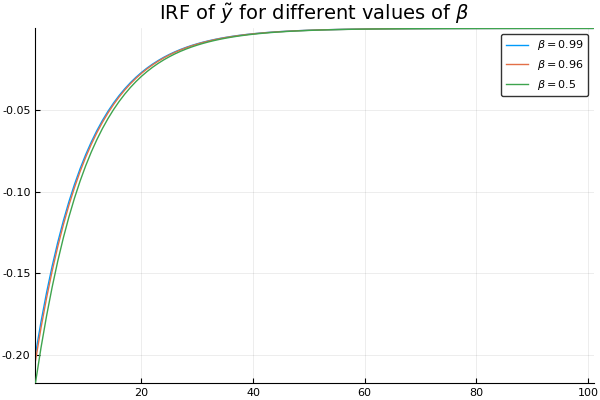

In [208]:
plot(yvals,title=L"IRF of $\tilde y$ for different values of $\beta$",label=labels)


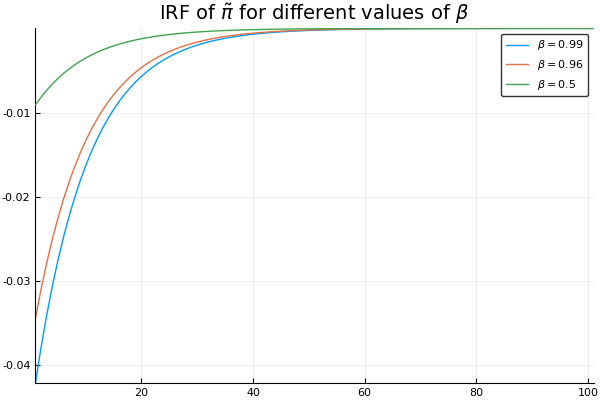

In [209]:
plot(pivals,title=L"IRF of $\tilde \pi$ for different values of $\beta$",label=labels)

### Lower $\theta$

In [217]:
gammayvec=[];
gammapivec=[];
yvals=Array{Vector}(3);
pivals=Array{Vector}(3);
thetavec  =[0.16^(-1), 0.2^(-1), 0.5^(-1)];
labels = Array{String}(1, 3)

for i = 1:3
    lambda = ((1-beta*rho)*(thetavec[i]*(1-rho)+phiy)+kappa*(phipi-rho))^(-1)
    
    gammay = -(1-beta*rho)*lambda
    gammapi = -kappa*lambda
    
    gammayvec = [gammayvec;gammay]
    gammapivec = [gammapivec;gammapi]
    
    yvals[i]=gammayvec[i]*eps
    pivals[i]=gammapivec[i]*eps
    
    b = string(L"$\theta = $", round(thetavec[i],2))
    labels[i] = b
end


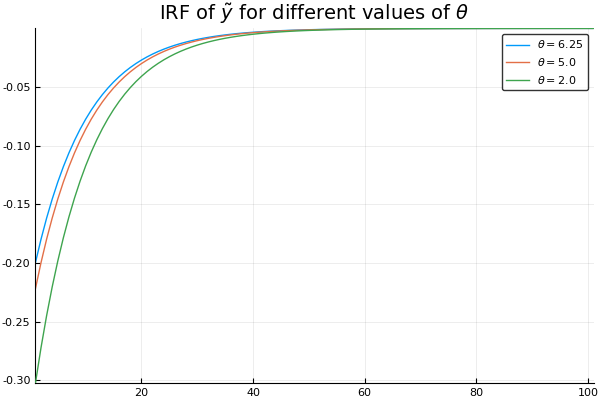

In [219]:
plot(yvals,title=L"IRF of $\tilde y$ for different values of $\theta$",label=labels)


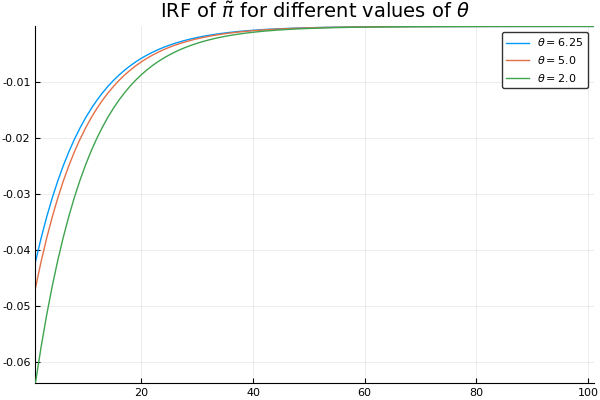

In [220]:
plot(pivals,title=L"IRF of $\tilde \pi$ for different values of $\theta$",label=labels)

### Higher $\kappa$

In [221]:
gammayvec=[];
gammapivec=[];
yvals=Array{Vector}(3);
pivals=Array{Vector}(3);
kappavec  =[0.023, 0.03, 0.05];
labels = Array{String}(1, 3)

for i = 1:3
    lambda = ((1-beta*rho)*(theta*(1-rho)+phiy)+kappavec[i]*(phipi-rho))^(-1)
    
    gammay = -(1-beta*rho)*lambda
    gammapi = -kappavec[i]*lambda
    
    gammayvec = [gammayvec;gammay]
    gammapivec = [gammapivec;gammapi]
    
    yvals[i]=gammayvec[i]*eps
    pivals[i]=gammapivec[i]*eps
    
    b = string(L"$\kappa = $", kappavec[i])
    labels[i] = b
end


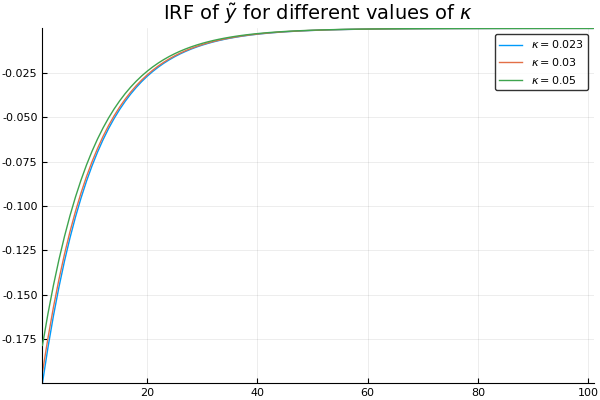

In [223]:
plot(yvals,title=L"IRF of $\tilde y$ for different values of $\kappa$",label=labels)


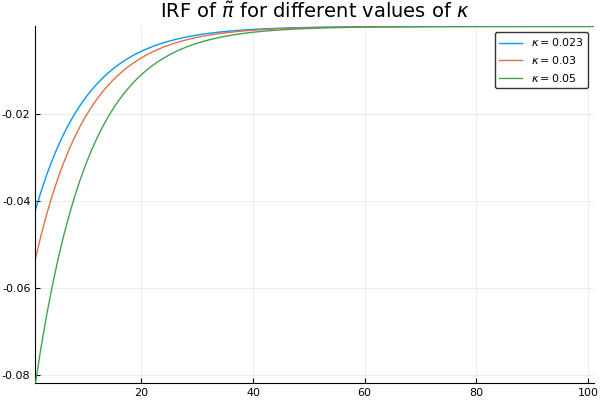

In [224]:
plot(pivals,title=L"IRF of $\tilde \pi$ for different values of $\kappa$",label=labels)

### Lower $\phi_{\pi}$

In [228]:
gammayvec=[];
gammapivec=[];
yvals=Array{Vector}(3);
pivals=Array{Vector}(3);
phipivec =[1.5, 1, 0.5];
labels = Array{String}(1, 3)

for i = 1:3
    lambda = ((1-beta*rho)*(theta*(1-rho)+phiy)+kappa*(phipivec[i]-rho))^(-1)
    
    gammay = -(1-beta*rho)*lambda
    gammapi = -kappavec*lambda
    
    gammayvec = [gammayvec;gammay]
    gammapivec = [gammapivec;gammapi]
    
    yvals[i]=gammayvec[i]*eps
    pivals[i]=gammapivec[i]*eps
    
    b = string(L"$\phi_{\pi} = $", phipivec[i])
    labels[i] = b
end


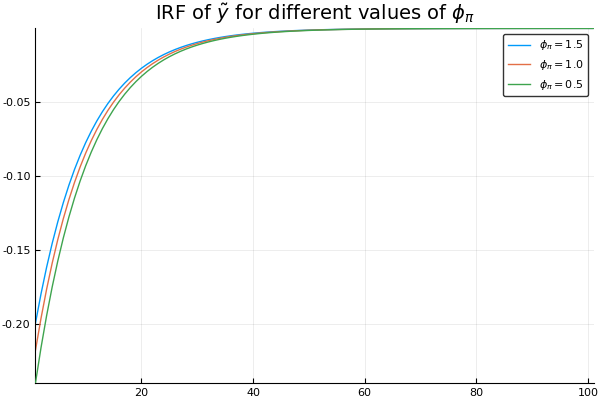

In [229]:
plot(yvals,title=L"IRF of $\tilde y$ for different values of $\phi_{\pi}$",label=labels)


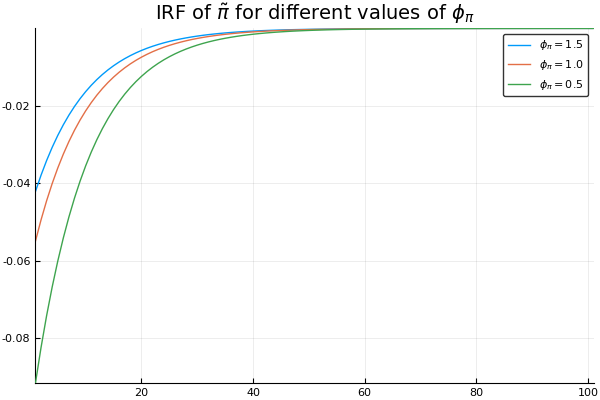

In [230]:
plot(pivals,title=L"IRF of $\tilde \pi$ for different values of $\phi_{\pi}$",label=labels)

### Hihger $\phi_{y}$

In [233]:
gammayvec=[];
gammapivec=[];
yvals=Array{Vector}(3);
pivals=Array{Vector}(3);
phiyvec =[0.5, 1, 1.5];
labels = Array{String}(1, 3)

for i = 1:3
    lambda = ((1-beta*rho)*(theta*(1-rho)+phiyvec[i])+kappa*(phipi-rho))^(-1)
    
    gammay = -(1-beta*rho)*lambda
    gammapi = -kappavec*lambda
    
    gammayvec = [gammayvec;gammay]
    gammapivec = [gammapivec;gammapi]
    
    yvals[i]=gammayvec[i]*eps
    pivals[i]=gammapivec[i]*eps
    
    b = string(L"$\phi_{y} = $", phiyvec[i])
    labels[i] = b
end


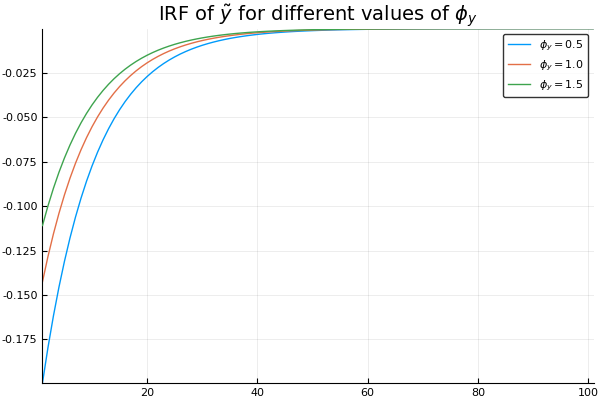

In [234]:
plot(yvals,title=L"IRF of $\tilde y$ for different values of $\phi_{y}$",label=labels)


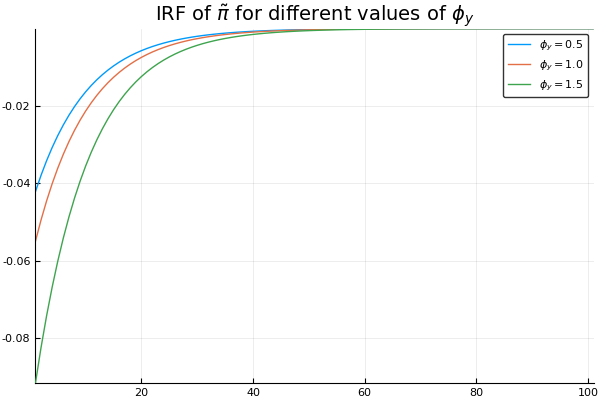

In [237]:
plot(pivals,title=L"IRF of $\tilde \pi$ for different values of $\phi_{y}$",label=labels)